## 0.0 Planejamento da solução 

**Input - Entrada** 

1. Problema de Negócio
    -- Selecionar os clientes mais valiosos para integrar um programa de fidelização
    

2. Conjunto de dados
    -- Vendas de um e-ccomerce online durante um período de 1 ano.   
    


**Output - Saída**

A indicação de pessoas para fazer parte do programa de fidelidade "INSIDERS".

Relatório com as respostas para as seguintes perguntas:
    Quem são as pessoas elegíveis para participar do programa de Insiders ?
    
    1. Quantos clientes farão parte do grupo?
    
    2. Quais as principais características desses clientes ?
    
    3. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    
    4. Qual a expectativa de faturamento desse grupo para os próximos meses ?
    
    5. Quais as condições para uma pessoa ser elegível ao Insiders ?
    
    6. Quais as condições para uma pessoa ser removida do Insiders ?
    
    7. Qual a garantia que o programa Insiders é melhor que o restante da base ?
    
    8. Quais ações o time de marketing pode realizar para aumentar o faturamento?

 **Tasks - Processo**

1. Quem são as pessoas elegíveis para participar do programa de Insiders ?
    --O que é ser elegível. Para a empresa o que são clientes com maior valor?

        Faturamento:
            Alto Ticket MédioAlto LTVBaixa Recência ou Alta Frequência ( tempo entre as compras )

            Alto Basket Size ( quantidade média de produtos comprados )

            Baixa probabilidade de Churn
            
            Previsão alta de LTV
            
            Alta propensão de compra

        Custo:

            Baixo número de devoluções

        Experiência de compra:  

            Média alta de avaliações
            
2. Quantos clientes farão parte de cada grupo
     --Número total de clientes
         %do grupo de insiders
     
3. Quais as principais características desses clientes?
      -- Escrever caracteristicas desses clientes
              idade
              Localização
       
      -- Escrever caracteristicas do consumo
              Atributos de clusterização
              
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
        --Faturamento total do ano
        --Faturamento do grupo de insiders        
        

5. Qual a expectativa de faturamento desse grupo para os próximos meses ?
        --LTV do grupo de insiders
        --Analise de cohort
   
6. Quais as condições para uma pessoa ser elegível ao Insiders ?
        -- Definir a periodicidade
        -- Pessoas com caracteristicas parecidas com os outros insders do grupo


7. Quais as condições para uma pessoa ser removida do Insiders ?
         -- Definir a periodicidade
         -- Não estar dentro das características acima

8. ual a garantia que o programa Insiders é melhor que o restante da base ?
        -- teste A/B
        --teste A/B baysiano
        -- Teste de hipoteses
        
        
9. Quais ações o time de marketing pode realizar para aumentar o faturamento? 
        -- Desconto
        -- frete
        -- Visita a empresa
        -- brinde
    
        



## 0.0 Imports

In [110]:
import re
import warnings
import pandas as pd

import numpy as np
import seaborn as sns
from matplotlib import cm

import umap.umap_ as umap

from matplotlib import pyplot as plt
from scipy.cluster import hierarchy as hc
from sklearn import cluster as c
from sklearn import metrics       as m
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn import ensemble as en
from pandas_profiling import ProfileReport
from sklearn import mixture as mx

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from plotly import express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from IPython.display import HTML




warnings.filterwarnings("ignore")

## 0.1 Helper Functions

In [2]:
#def jupyter_settings():
#    %matplotlib inline
#    %pylab inline
#    
#    plt.style.use( 'bmh' )
#    plt.rcParams['figure.figsize'] = [25, 12]
#    plt.rcParams['font.size'] = 24
#    
#    display( HTML( '<style>.container { width:100% !important; }</style>') )
#    pd.options.display.max_columns = None
#    pd.options.display.max_rows = None
#    pd.set_option( 'display.expand_frame_repr', False )
#    
#   sns.set()

## 0.2 Load Dataset

In [3]:
df_raw = pd.read_csv('Data/ecommerce.csv',encoding='cp1252')
df_raw.drop('Unnamed: 8', axis=1, inplace=True)

In [4]:
df_raw.shape

(541909, 8)

# <font color='red' > 1.0 Data Descriptions </font>

In [5]:
df1 = df_raw.copy()

In [6]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## 1.1 Rename Columns

In [7]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
cols_new =['Invoice_No', 'Stock_Code', 'Description', 'Quantity', 'Invoice_Date',
       'Unit_Price', 'Customer_ID', 'Country']


cols_new = list( (map(lambda x: x.lower(), cols_new)) )


df1.columns = cols_new

## 1.2 Data Dimensions

In [9]:
print(f'Numbers of rows: { df1.shape[0] }\n')
print(f'Numbers of columns: { df1.shape[1] }')

Numbers of rows: 541909

Numbers of columns: 8


## 1.3 Data Types

In [10]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4 Check NA

In [11]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5 Replace NA

In [12]:
# A estratégia é preencher os nAs pra fazer um estudo geral
df_missing =df1.loc[df1['customer_id'].isna(), :]
df_not_missing = df1.loc[~df1['customer_id'].isna(), :]


In [13]:
# Create reference

df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
df_backup['customer_id'] = np.arange( 19000, 19000+len(df_backup), 1)

#Merge original with refrece dataframe
df1 = pd.merge(df1, df_backup, on='invoice_no', how='left')

#coalesce
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

#Drop extra columns
df1 = df1.drop( columns=['customer_id_x', 'customer_id_y'], axis=1)
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,United Kingdom,17850.0


In [14]:
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

## 1.6 Change dtypes

In [15]:
# invoicedate
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], format='%d-%b-%y')

#customerid
df1['customer_id'] = df1['customer_id'].astype('int64')


In [16]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## 1.7 Descriptive Statistics

In [17]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'])
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1 Numerical Attributes

In [109]:
#central tendency - mean, median, 
ct1 = pd.DataFrame(num_attributes.apply(np.mean) ).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#Dispersion - std, 
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew()) ).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis()) ).T

#Merge
n = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
n.columns = ['attributes', 'min', 'max', 'range','mean', 'median', 'std','skew','kurtosis']
n

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


### 1.7.1.1 Numerical Attributes - investigating

1. Quantidade negativa (devolução?)

2. Preço unitario igua a zero (promoção??)

### 1.7.1 Categorical Attributes

### Invoice_no

In [19]:
# problema: O invoice tem numeros e letras

df_letter_invoices = df1.loc[df1['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), :]

#Verificar se todos os invoices são negativos
print(f'total de invoices com letras: {len(df_letter_invoices)}')

#Verificar se todos os invoices são negativos
print(f'total de invoices com valores negativos: {len(df_letter_invoices[ df_letter_invoices["quantity"] < 0 ])}')


total de invoices com letras: 9291
total de invoices com valores negativos: 9288


Todos os invoices constituidos por numeros e letras são negativos, então vou assumir que é um retorno.

## Stoke_code

In [20]:
#at_least_one_string = len(cat_attributes.loc[ cat_attributes['stock_code'].apply( lambda x: bool( re.search('[^0-9]+', x))), 'stock_code'].drop_duplicates())

cat_attributes.loc[ cat_attributes['stock_code'].apply( lambda x:  bool( re.search( '^[a-zA-z]+$', x))),'stock_code'].unique()

#Ação
# Remover 'POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK'

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

### Description

In [21]:
#Ação
#Deletar description

### Country

In [22]:
len(df1['country'].unique())

38

In [23]:
#Representatividade de cada país nas compras

df1['country'].value_counts(normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

In [24]:
df1[['customer_id', 'country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id', ascending=False).head()

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31


# <font color='red' > 2.0 Filtering Variable</font>

In [25]:
df2 =df1.copy()

In [26]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

In [27]:
#=====================Numerical Attributes=================================
#Quantity
df2 = df2.loc[df2['unit_price']>= 0.04]


#=====================Caterical Attributes=================================
df2 = df2[~df2['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'])]

#Description
df2 = df2.drop(columns='description', axis=1)

#map
df2 = df2[~df2['country'].isin(['European Community', 'Unspecified'])]

#Quantity
df_return = df2.loc[df1['quantity']<0, :]
df2_purchase = df2.loc[df1['quantity']>= 0, :]

#Bad Users
df2 = df2[~df2['customer_id'].isin( [16446] )]



# <font color='red' > 3.0 Feature Engeneering</font>

In [28]:
# future ideas:
# calculate moving Avg: 7d, 14d, 30d
# AVG financial

In [29]:
df3= df2.copy()

## 3.1 Feature Creation

In [30]:
# Data reference
df_ref = df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price', 
                   'country'], axis=1).drop_duplicates(ignore_index=True)

### 3.1.1 Gross Revenue

In [31]:
#Gross Revenue (Faturamento) - Quantidade * preco
df2_purchase[ 'gross_revenue'] = df2_purchase['quantity'] * df2_purchase['unit_price']

#Monetary
df_monetary = df2_purchase[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()

df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')


### 3.1.2 Recency - Day from last purchase

In [32]:
# Recency - Last day purchase
df_recency = df2_purchase.loc[:, ['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df2['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

### 3.1.3 Quantity of purchase

In [33]:
#Products number
df_freq = (df2_purchase.loc[:,['customer_id', 'invoice_no']].drop_duplicates()
                                                     .groupby('customer_id')
                                                     .count()
                                                     .reset_index()
                                                     .rename(columns={'invoice_no':'qtde_invoices'}))
           
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
dtype: int64

### 3.1.4 Quantity total of items purchased

In [34]:
#Products number
df_freq = (df2_purchase.loc[:,['customer_id', 'quantity']].groupby('customer_id')
                                                          .sum()
                                                          .reset_index()
                                                          .rename(columns={'quantity':'qtde_items'}))


df_ref =pd.merge(df_ref, df_freq, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
dtype: int64

### 3.1.5 Quantity of products purchased

In [35]:
#Products number
df_freq = (df2_purchase.loc[:,['customer_id', 'stock_code']].groupby('customer_id')
                                                            .count()
                                                            .reset_index()
                                                            .rename(columns={'stock_code':'qtde_products'}))
           
df_ref =pd.merge(df_ref, df_freq, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
dtype: int64

In [36]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products
0,17850,5391.21,372.0,34.0,1733.0,297.0
1,13047,3232.59,56.0,9.0,1390.0,171.0
2,12583,6705.38,2.0,15.0,5028.0,232.0
3,13748,948.25,95.0,5.0,439.0,28.0
4,15100,876.00,333.0,3.0,80.0,3.0


### 3.1.6 Avg Ticket Value

In [37]:
#AVG tiket
df_avg_ticket = df2_purchase[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
avg_ticket       91
dtype: int64

### 3.1.7 Avg Recency Days

In [38]:
# Average recency days
df_aux = df2[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], 
                                                                            ascending=[False, False])
df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
df_aux['previous_date'] = df_aux['invoice_date'].shift() # next invoince date

df_aux['avg_recency_days'] = df_aux.apply( lambda x: ( x['previous_date'] - x['invoice_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )

df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'previous_date'], axis=1 ).dropna()
df_aux =df_aux.dropna()
 #average recency 
df_avg_recency_days = df_aux.groupby( 'customer_id' ).mean().reset_index()
 #merge
df_ref = pd.merge( df_ref, df_avg_recency_days, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
dtype: int64

In [39]:
df_aux.head()

,customer_id,avg_recency_days
392716,18287,16.0
198716,18287,143.0
514067,18283,6.0
494085,18283,7.0
456033,18283,13.0


### 3.1.8 Frequency Purchase

In [40]:
#Calcular a data máx, a data min, calcular a diferença uma da outra 
#df2_max = df2[['customer_id', 'invoice_date']].drop_duplicates().groupby('customer_id').max()
#df2_min = df2[['customer_id', 'invoice_date']].drop_duplicates().groupby('customer_id').min()
#df_purchase = df2[['customer_id', 'invoice_date']].drop_duplicates().groupby('customer_id').count()
#df_purchase.head()

In [41]:
#COmo Fazer todo esse processo apenas uma vez
df_aux = (df2_purchase[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                           .groupby('customer_id')
                                                           .agg(max_ =('invoice_date', 'max'),
                                                                min_ =('invoice_date', 'min'),
                                                                days_ =('invoice_date', lambda x:(( x.max() - x.min()).days)+1),
                                                                buy_ =('invoice_date', 'count'))).reset_index()
#Frequency
df_aux['frequency'] =df_aux[['buy_', 'days_']].apply( lambda x: x['buy_']/ x['days_'] if x['days_'] != 0 else 0, axis=1)

#Merge
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'frequency']], how='left', on='customer_id')

In [42]:
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
dtype: int64

### 3.1.9 Number of Returns

In [43]:
df_return = df_return[['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'qtde_returns'})
df_return['qtde_returns'] = df_return['qtde_returns']* -1


#Merge
df_ref = pd.merge(df_ref, df_return, on='customer_id', how='left')
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] =0 
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
qtde_returns           0
dtype: int64

### 3.2 Basket Size - Quantidade de itens por cesta
-invoice_no  = compra - purchase

-stock_code = produto - products

-Quantity = item = item

In [44]:
df_aux = (df2_purchase.loc[:,['customer_id', 'invoice_no', 'quantity']].groupby('customer_id')
                                                                         .agg(n_purchase=('invoice_no', 'nunique'),
                                                                              n_products=('quantity', 'sum'))
                                                                         .reset_index() )
df_aux['avg_basket_size'] = df_aux['n_products']/ df_aux['n_purchase']

df_ref= pd.merge(df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id')

df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
qtde_returns           0
avg_basket_size       91
dtype: int64

### 3.2.1 Unique Basket Size - variedade de itens por cesta

In [45]:
df_aux = (df2_purchase.loc[:,['customer_id', 'invoice_no', 'stock_code']].groupby('customer_id')
                                                                       .agg(n_purchase=('invoice_no', 'nunique'),
                                                                              n_products=('stock_code', 'nunique'))
                                                                       .reset_index() )


df_aux['avg_unique_basket_size'] =df_aux['n_products']/ df_aux['n_purchase']

df_ref= pd.merge(df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id')
           

In [46]:
df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtde_invoices               91
qtde_items                  91
qtde_products               91
avg_ticket                  91
avg_recency_days          2816
frequency                   91
qtde_returns                 0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

In [47]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.500000,17.000000,40.0,50.970588,0.617647
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035,27.250000,0.028302,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500,23.187500,0.040323,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071,92.666667,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000,8.600000,0.073171,22.0,26.666667,0.333333


# <font color='red' > 4.0 EDA - Exploratory Data Analysis</font>  

In [48]:
df4 =df_ref.dropna()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices             0
qtde_items                0
qtde_products             0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

## 4.1 Bivariate Analysis

**Notes**
1. CLusters coesos e separados
2. Metricas:
       - Min, Max, Range (dispersão)
       - Média e Mediana 
       - Desvio padrão e variancia
       - Coenficiente de Variação (strd/mean)
       - Distribuição

In [49]:
#profile = ProfileReport(df4)
#profile.to_file('output_2.html')

### 4.1.1 Gross Revenue

In [50]:
df4[df4['gross_revenue'] >=279138.02]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.503893,7.844444,0.20339,288.0,2733.944444,9.708333


In [51]:
df4.sort_values('gross_revenue', ascending=False).head(10)

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.503893,7.844444,0.203390,288.0,2733.944444,9.708333
492,18102,259657.30,0.0,60.0,64124.0,431.0,602.453132,14.680000,0.163043,0.0,1068.733333,2.500000
433,17450,194550.79,8.0,46.0,69993.0,337.0,577.302047,12.821429,0.127778,952.0,1521.586957,2.695652
66,14911,140450.72,1.0,199.0,80263.0,5673.0,24.757751,2.601399,0.533512,3332.0,403.331658,8.974874
1150,12415,124564.53,24.0,20.0,77373.0,713.0,174.704811,20.866667,0.063694,427.0,3868.650000,22.150000
190,14156,117379.63,9.0,55.0,57885.0,1400.0,83.842593,7.260000,0.151515,859.0,1052.454545,12.981818
15,17511,91062.38,2.0,31.0,64549.0,963.0,94.561142,11.593750,0.083333,1535.0,2082.225806,14.612903
12,16029,72882.09,38.0,62.0,40207.0,241.0,302.415311,9.054054,0.184524,8004.0,648.500000,0.693548
955,16684,66653.56,4.0,28.0,50255.0,277.0,240.626570,22.125000,0.078873,864.0,1794.821429,4.250000
36,13694,65039.62,3.0,50.0,63312.0,568.0,114.506373,9.736842,0.134771,1504.0,1266.240000,7.320000


In [52]:
df3[df3['customer_id']== 14646].head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
37952,539491,21981,12,2016-12-18,0.29,Netherlands,14646
37953,539491,21986,12,2016-12-18,0.29,Netherlands,14646
37954,539491,22720,2,2016-12-18,4.95,Netherlands,14646
37955,539491,21931,1,2016-12-18,1.95,Netherlands,14646
37956,539491,22613,2,2016-12-18,0.85,Netherlands,14646


In [53]:
np.sum(df3.loc[df3['customer_id']== 14646, 'quantity'] * df3.loc[df3['customer_id']==14646, 'unit_price'])

278778.02

### 4.1.2 Quantidade de itens

In [54]:
df4[df4['qtde_products'] == 7838]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
68,17841,40967.72,1.0,124.0,23053.0,7838.0,5.226808,3.321429,0.33244,203.0,185.91129,10.66129


### 4.1.3 AVG Ticket

In [55]:
df4[df4['avg_ticket']== 56157.5]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size


In [56]:
df3[df3['customer_id'] == 16446]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id


### 4.1.4 Frequency

In [57]:
df4[df4['frequency']==17]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.5,17.0,40.0,50.970588,0.617647


In [58]:
df3[df3['customer_id'] == 17850].sort_values('quantity', ascending=False).head(30)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
4528,536790,84406B,12,2016-11-30,2.75,United Kingdom,17850
4162,536750,71053,12,2016-11-30,3.39,United Kingdom,17850
3808,536685,85123A,12,2016-11-30,2.55,United Kingdom,17850
4526,536790,85123A,12,2016-11-30,2.95,United Kingdom,17850
4527,536790,71053,12,2016-11-30,3.39,United Kingdom,17850
3809,536685,71053,12,2016-11-30,3.39,United Kingdom,17850
4531,536790,37370,12,2016-11-30,1.06,United Kingdom,17850
4532,536790,21071,12,2016-11-30,1.06,United Kingdom,17850
4533,536790,21068,12,2016-11-30,1.06,United Kingdom,17850
290,536396,82494L,12,2016-11-29,2.55,United Kingdom,17850


### 4.1.5 AVG Basket size

In [59]:
df4[df4['avg_basket_size']==40498.5]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size


## 4.2 Bivariate Analysis

In [60]:
cols=['customer_id']
df42 = df4.drop(cols, axis=1)

<Figure size 1800x864 with 0 Axes>

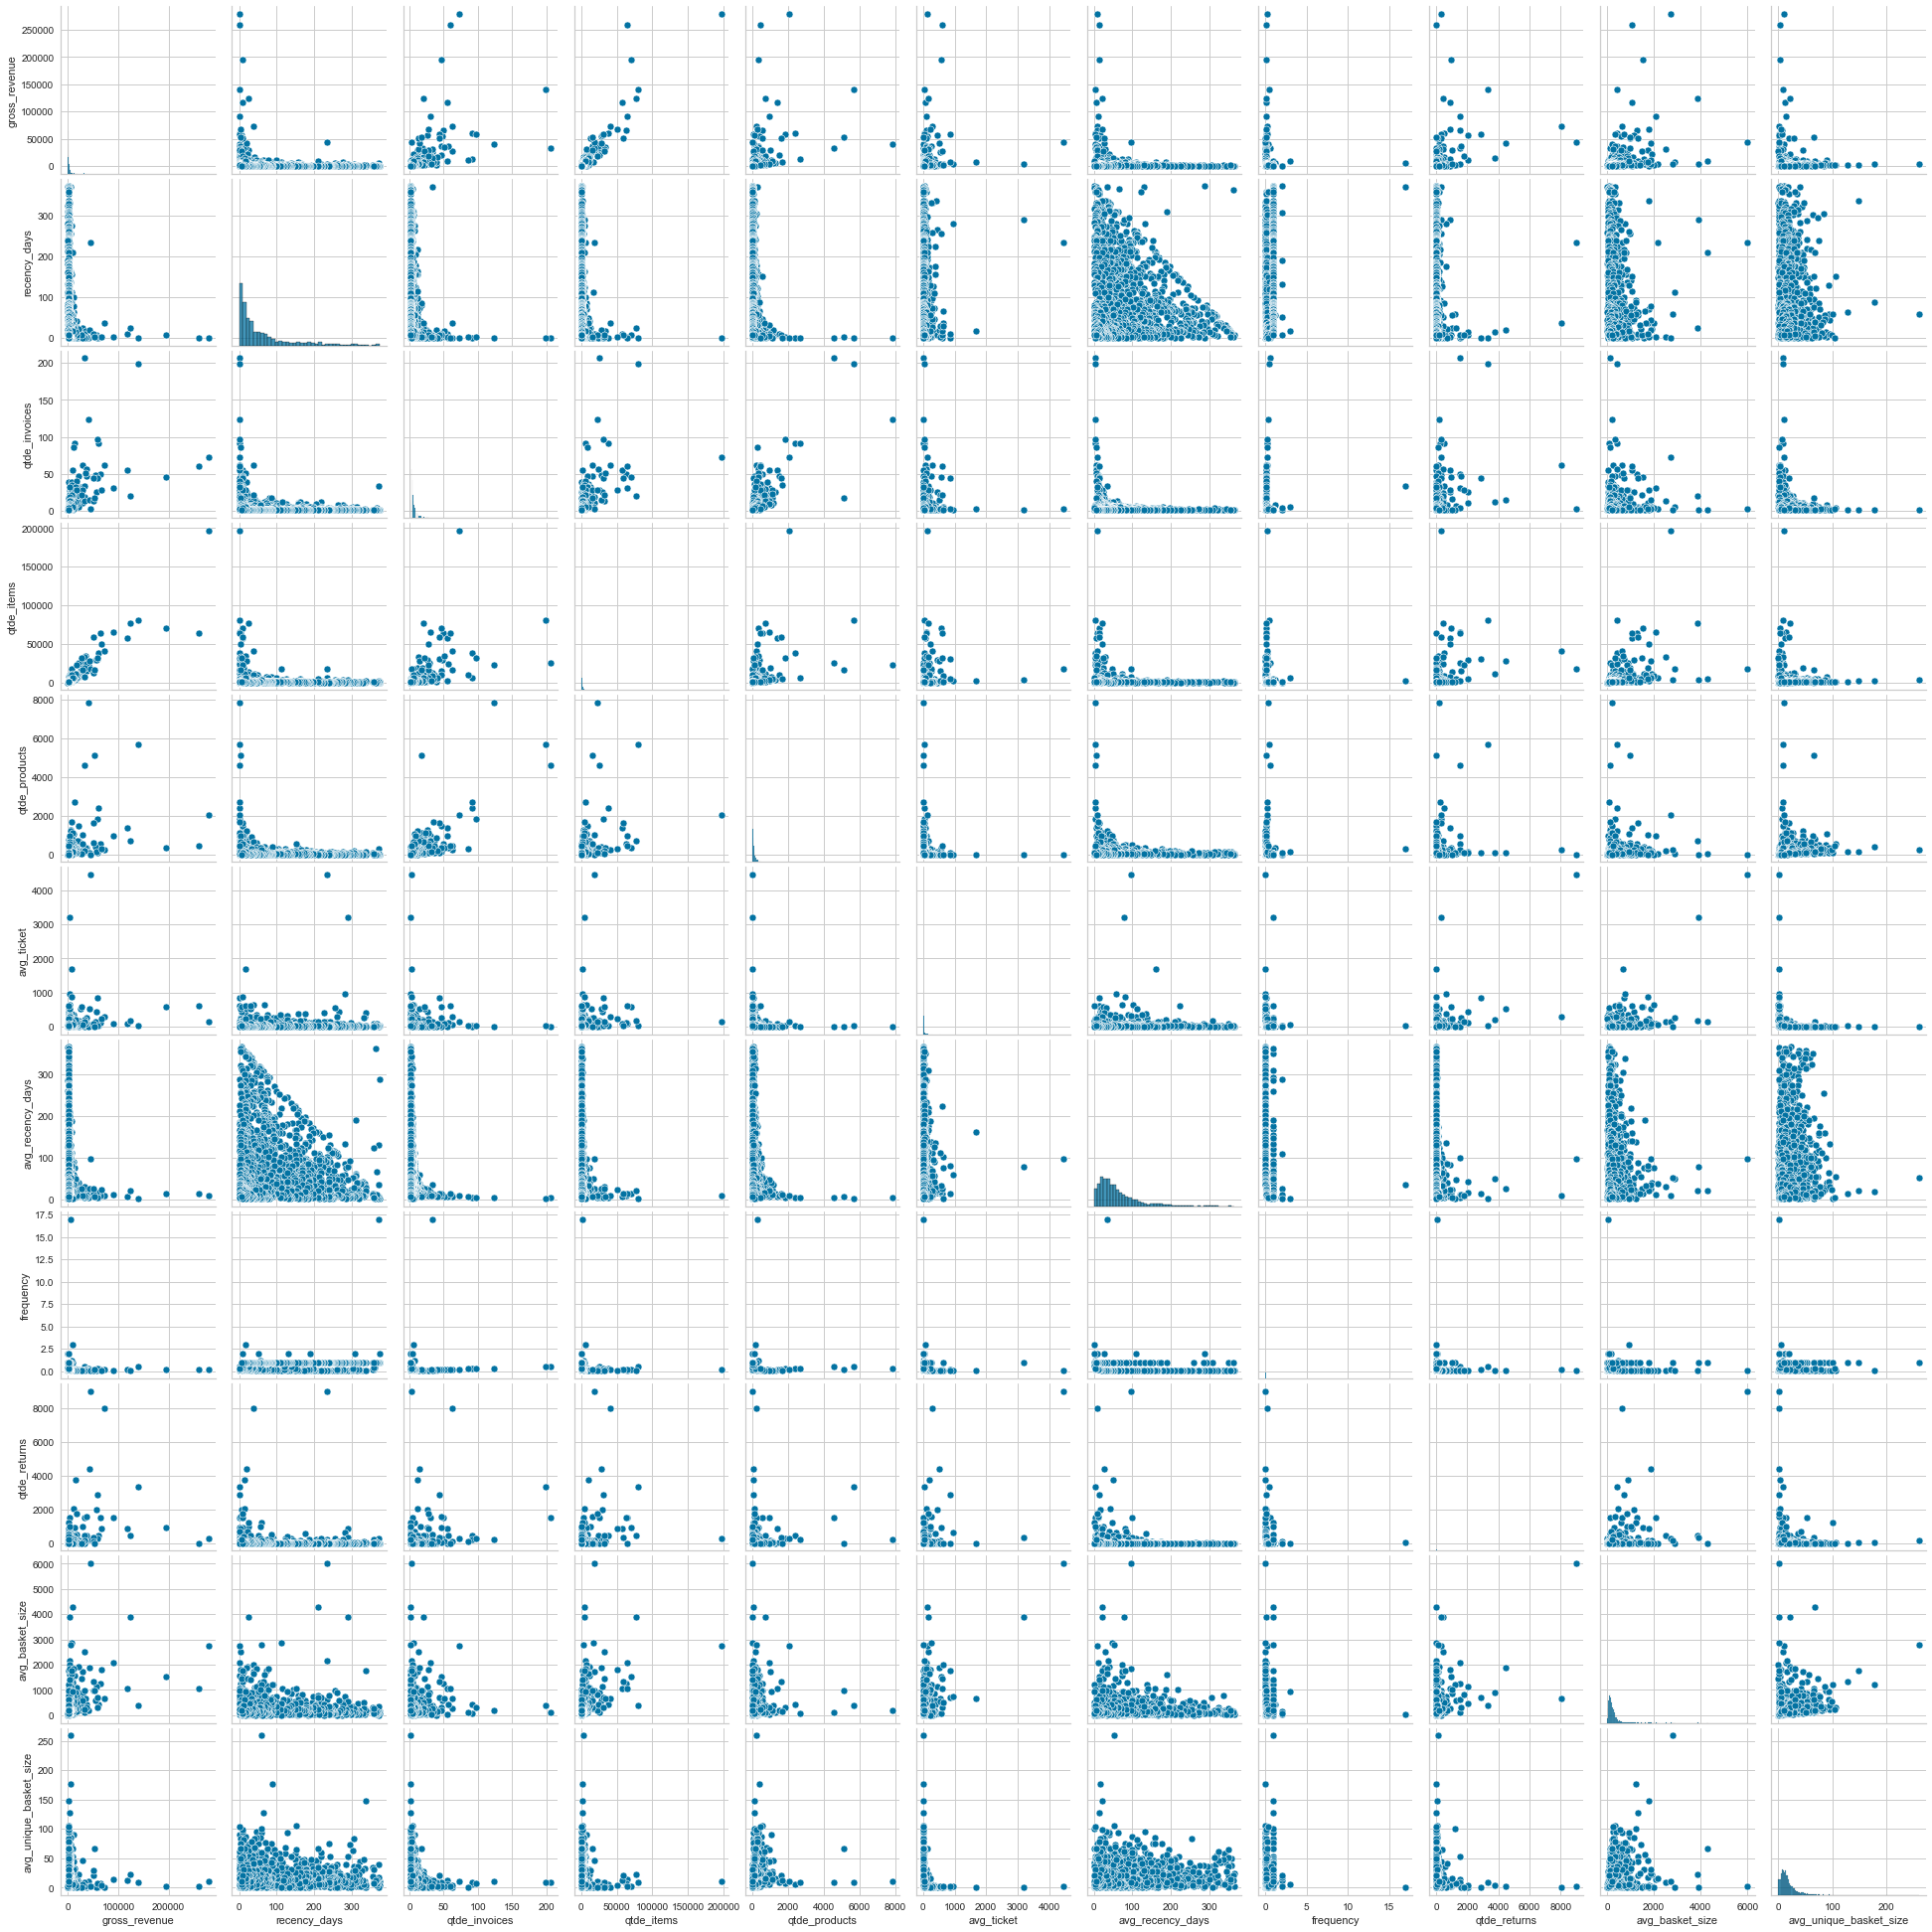

In [61]:
plt.figure(figsize=(25,12))
sns.pairplot( df42)

**Notes**
1. Recency Days has low variance
2. Avg Ticket has low variance

## 4.3 Estudo do Espaço

In [63]:
#original dataset
#df43 = df4.drop(columns=['customer_id'], axis=1)

#selected dataset
cols_Selected = ['customer_id', 'gross_revenue','recency_days', 'qtde_products', 'frequency', 'qtde_returns']
df43= df4[cols_Selected]

In [64]:
mm = pp.MinMaxScaler()

#
df43['gross_revenue']         =  mm.fit_transform(df43[['gross_revenue']])
df43['recency_days']          =  mm.fit_transform(df43[['recency_days']])
#df43['qtde_invoices']         =  mm.fit_transform(df43[['qtde_invoices']])
#df43['qtde_items']            =  mm.fit_transform(df43[['qtde_items']])
df43['qtde_products']         =  mm.fit_transform(df43[['qtde_products']])
#df43['avg_ticket']            =  mm.fit_transform(df43[['avg_ticket']])
#df43['avg_recency_days']      =  mm.fit_transform(df43[['avg_recency_days']])
df43['frequency']             =  mm.fit_transform(df43[['frequency']])
df43['qtde_returns']          =  mm.fit_transform(df43[['qtde_returns']])
#df43['avg_basket_size']       =  mm.fit_transform(df43[['avg_basket_size']])
#df43['avg_unique_basket_size']=  mm.fit_transform(df43[['avg_unique_basket_size']])

X = df43.copy()

### 4.3.1 PCA

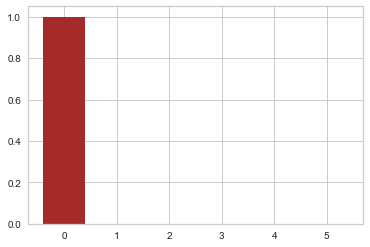

In [65]:
pca = dd.PCA( n_components=X.shape[1])

principal_components = pca.fit_transform(X)

#plot explained variable

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color='brown')

#pca component
df_pca = pd.DataFrame(principal_components)

<AxesSubplot:xlabel='0', ylabel='1'>

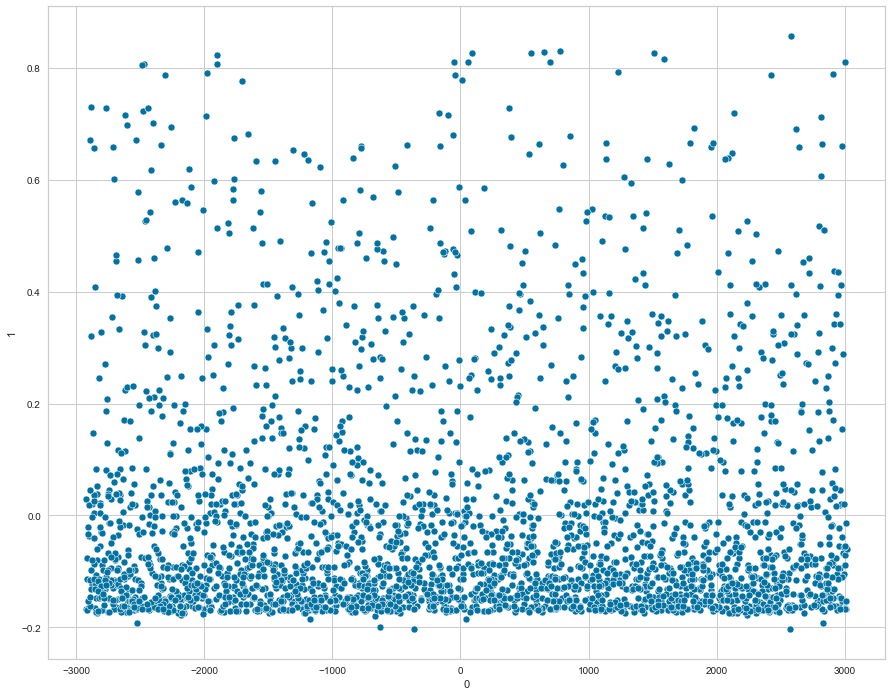

In [66]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=0, y=1, data=df_pca)

### 4.3.2 UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

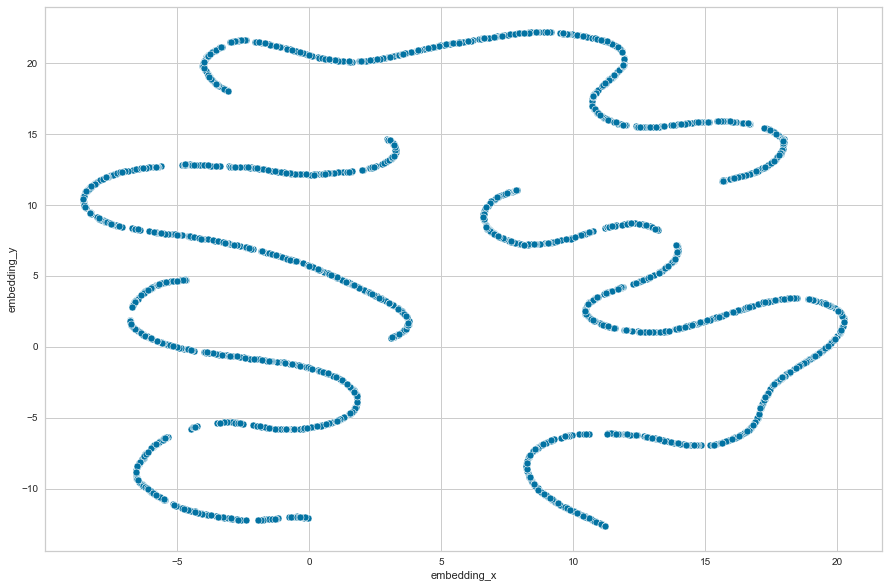

In [67]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

#embeding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot MAP
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'embedding_x', y = 'embedding_y', 
                data=df_pca)

### 4.3.3 t-SNE

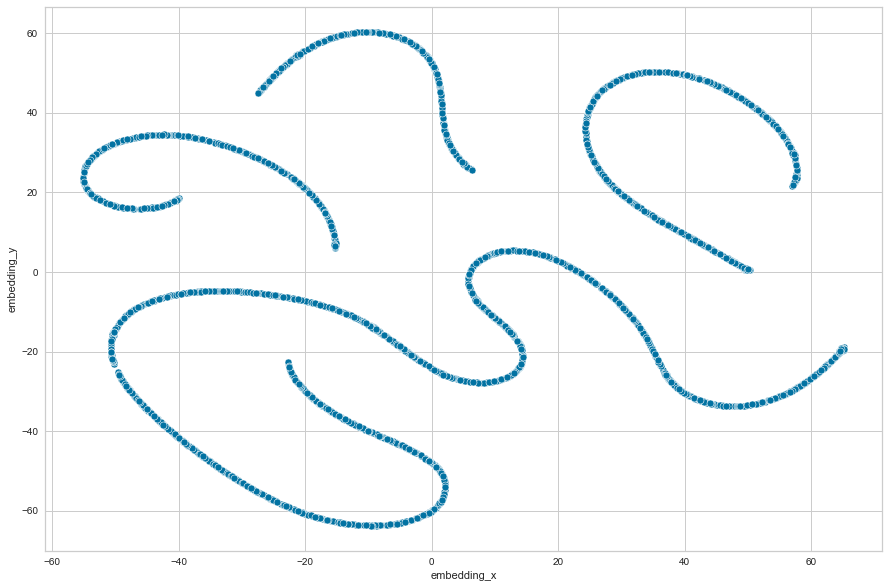

In [68]:
reducer = TSNE(n_components=2, n_jobs=-1, random_state=42 )
embedding = reducer.fit_transform(X)

#embeding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot MAP
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'embedding_x', y = 'embedding_y', 
                data=df_pca);

### 4.3.4 Tree badesd embeding

In [69]:
#training dataset
X= df4.drop(columns=['customer_id', 'gross_revenue'])
 
y = df4['gross_revenue']

#model definition
rf_model = en.RandomForestRegressor(n_estimators=100, random_state=42)

# Model Training
rf_model.fit(X, y)
#Leaf

#Dataframe

RandomForestRegressor(random_state=42)

In [70]:
X.shape

(2968, 10)

In [71]:
df_leaf = pd.DataFrame(rf_model.apply(X))

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

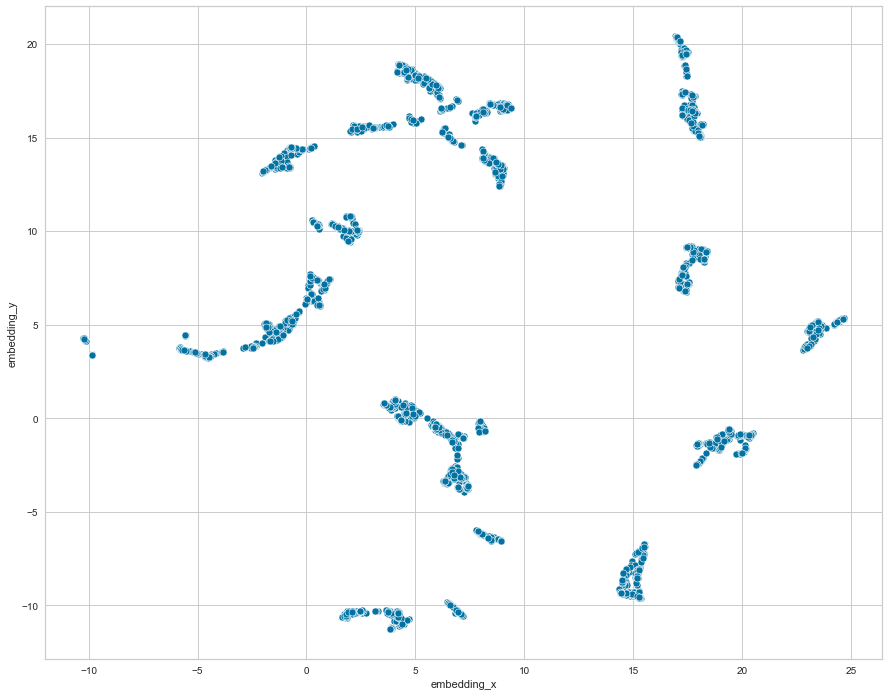

In [72]:
#Reduzir a dimensionalidade de 1000 para 2 dimensões
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_leaf)

#embeding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]

# plot MAP
plt.figure(figsize=(15,12))
sns.scatterplot(x = 'embedding_x', y = 'embedding_y', 
                data=df_tree)

# <font color='red' > 5.0 Data Preparations</font>

In [73]:
#df5 =df4.copy()
df5 = df_tree.copy()

In [74]:
df5_aux = df4.copy()

In [75]:
# Standard Scaler
#mm = pp.MinMaxScaler()
#ss = pp.StandardScaler()
#rs = pp.RobustScaler()
#
#df5['gross_revenue'] = mm.fit_transform( df5[['gross_revenue']])
#df5['recency_days'] = mm.fit_transform( df5[['recency_days']])
##df5['qtde_invoices'] = mm.fit_transform( df5[['qtde_invoices']])
##df5['qtde_items'] = mm.fit_transform( df5[['qtde_items']])
#df5['qtde_products'] = mm.fit_transform( df5[['qtde_products']])
##df5['avg_ticket'] = mm.fit_transform( df5[['avg_ticket']])
##df5['avg_recency_days'] = mm.fit_transform( df5[['avg_recency_days']])
#df5['frequency'] = mm.fit_transform( df5[['frequency']])
#df5['qtde_returns'] = mm.fit_transform( df5[['qtde_returns']])
##df5['avg_basket_size'] = mm.fit_transform( df5[['avg_basket_size']])
##df5['avg_unique_basket_size'] = mm.fit_transform( df5[['avg_unique_basket_size']])
#variable = 'frequency'

In [76]:
#Dados as is
#print(f'Min:{df5_aux[variable].min()} -Max:{df5_aux[variable].max()}')
#
#sns.displot(df5_aux[variable]);
#

In [77]:
# DAdos normalizados / Rescalados
#print(f'Min:{df5[variable].min()} -Max:{df5[variable].max()}')
#
#
#sns.displot(df5[variable]);

# <font color='red' > 6.0 Feature Selections</font>

In [78]:
#cols_selected = ['customer_id', 'gross_revenue','recency_days', 'qtde_products', 'frequency', 'qtde_returns']

In [142]:
#df6 =df5[cols_selected].copy()
df6 = df_tree.copy()

In [143]:
df6.head()

,embedding_x,embedding_y
0,24.632015,5.310959
1,20.140337,-1.596046
2,17.444908,18.421518
3,-5.817335,3.728041
4,6.212927,15.336797


# <font color='red' > 7.0 Hyper Parameter Fine-Tuning</font>

In [80]:
#X =df6.drop(columns=['customer_id'])
X=df_tree.copy()

In [81]:
X.head()

,embedding_x,embedding_y
0,24.632015,5.310959
1,20.140337,-1.596046
2,17.444908,18.421518
3,-5.817335,3.728041
4,6.212927,15.336797


In [82]:
#clusters = [2, 3, 4, 5, 6, 7, 8, 9]
clusters = np.arange(2, 25, 1)
clusters


array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])

## 7.1 K-means

In [83]:
kmeans_list = []
for k in clusters:
    # MOdel Definition
    kmeans_model = c.KMeans( n_clusters=k)

    #MOdel Training
    kmeans_model.fit(X)

    #Model Predict
    labels = kmeans_model.predict(X )

    #Model Perfomance
    sil = silhouette_score( X, labels, metric='euclidean')
    kmeans_list.append(sil)
    
    

In [84]:
kmeans_list

[0.44487852,
 0.4965284,
 0.5046398,
 0.5016215,
 0.5505824,
 0.56706506,
 0.5893881,
 0.6234398,
 0.6611983,
 0.6574343,
 0.6527047,
 0.6471372,
 0.6555663,
 0.6658047,
 0.6563993,
 0.6627434,
 0.66470337,
 0.66792774,
 0.69292694,
 0.70444757,
 0.7203305,
 0.7288121,
 0.70507383]

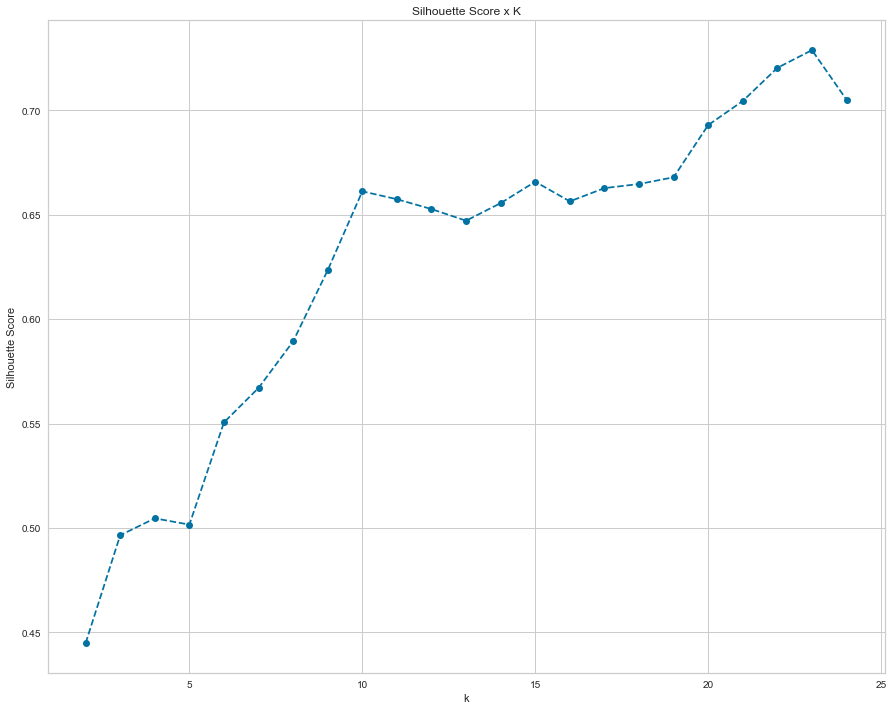

In [85]:
plt.figure(figsize=(15,12))
plt.plot(clusters, kmeans_list, linestyle='--', marker='o', color='b')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score x K');

## 7.2 GMM

In [86]:
gmm_list = []
for k in clusters:
    #Model definition
    gmm_model = mx.GaussianMixture(n_components=k)

    #Training
    gmm_model.fit( X )
    #Model predict
    labels = gmm_model.predict(X)

    #Model Performance
    sil = silhouette_score( X, labels, metric='euclidean')
    gmm_list.append(sil)
 

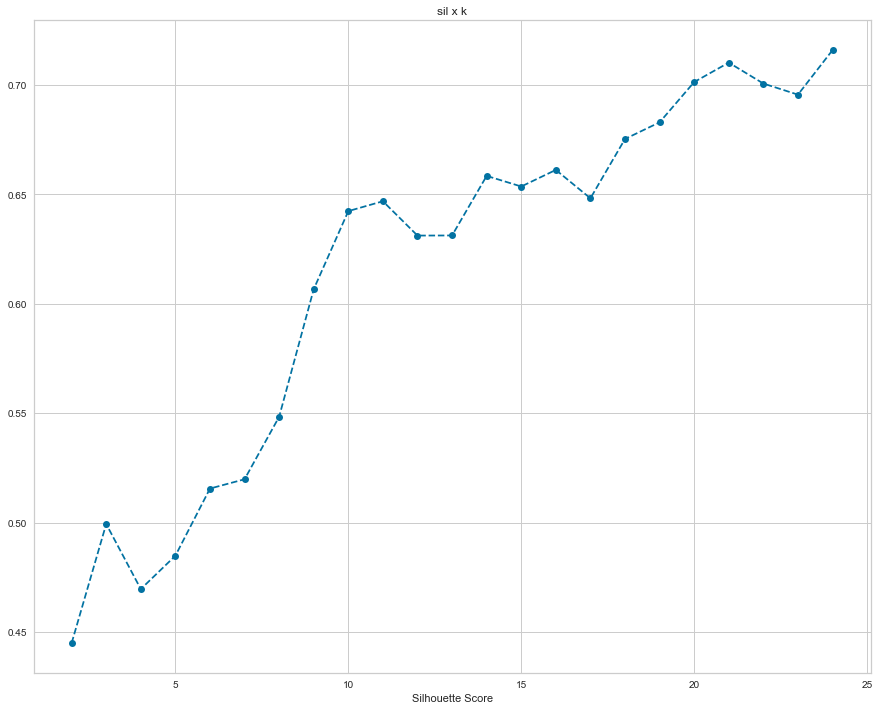

In [87]:
plt.figure(figsize=(15,12))
plt.plot(clusters, gmm_list, linestyle='--', marker='o', color='b')
plt.xlabel('k')
plt.xlabel('Silhouette Score')
plt.title( 'sil x k');

In [88]:
gmm_list

[0.44487852,
 0.49933717,
 0.4695939,
 0.48483154,
 0.5155441,
 0.51978636,
 0.5483475,
 0.6066843,
 0.64237016,
 0.646874,
 0.6311859,
 0.63123375,
 0.6584686,
 0.65361667,
 0.6611958,
 0.6482233,
 0.67535144,
 0.68295026,
 0.7013667,
 0.7102459,
 0.70068145,
 0.6955977,
 0.71595275]

## 7.3 Hierarchical Clustering

In [89]:
#Model definition and training
hc_model = hc.linkage(X, 'ward')

[]

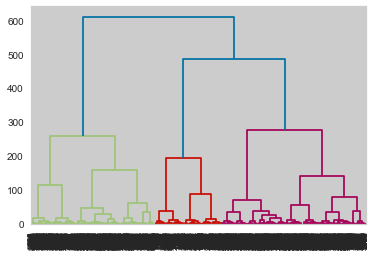

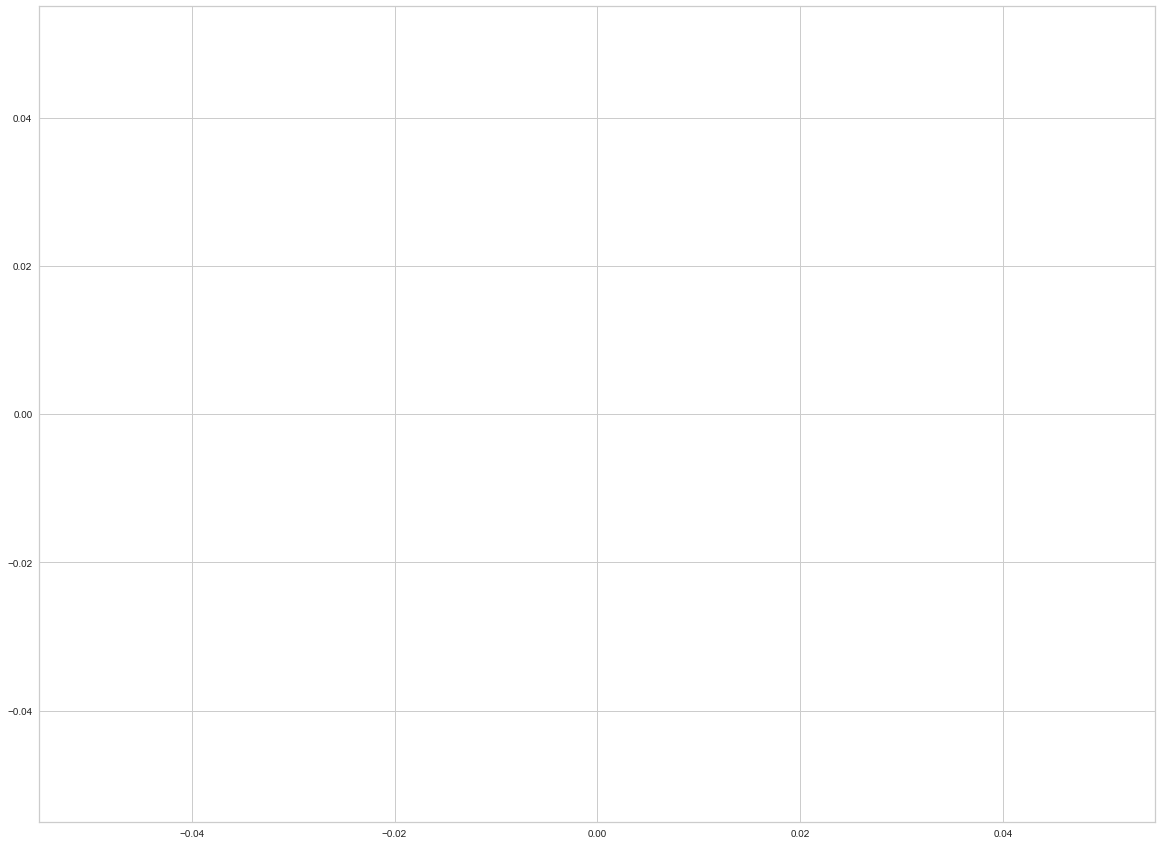

In [149]:
hc.dendrogram(
    hc_model,
    leaf_rotation=90,
    leaf_font_size=8)
plt.figure(figsize=(20,15))
plt.plot()
#Predict


#Model performance

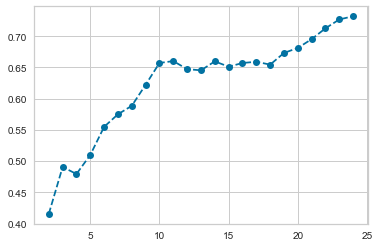

In [103]:
plt.plot(clusters, hc_list, linestyle='--', marker='o', color='b')

## 7.4 DBSCAN

In [95]:
eps=2.00
min_samples=20
#Model definition
dbscan_model = c.DBSCAN(eps=eps, min_samples = min_samples)

#mode training  e predict
labels = dbscan_model.fit_predict( X )

#Model Performance
sil = silhouette_score( X, labels, metric='euclidean')
print(f'Silhouette score = {sil}')
print(f'Number of clusters: {len(np.unique( labels ))}')
print(np.unique( labels ))

Silhouette score = 0.5762780904769897
Number of clusters: 12
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [96]:
neighbors = NearestNeighbors(n_neighbors=min_samples).fit(X)
distances, indices = neighbors.kneighbors( X )


In [97]:
dbscan_list= [0.622034, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000]

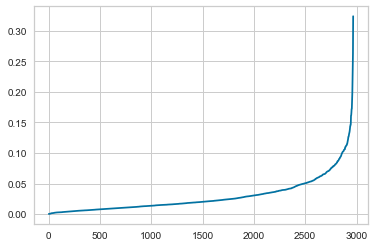

In [98]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

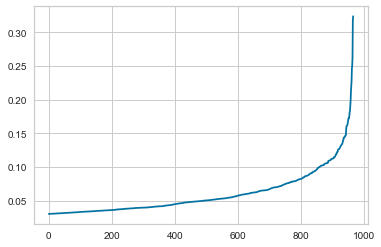

In [99]:
plt.plot(distances[2000:])

## 7.5 Resaults

In [104]:
df_results = pd.DataFrame({'KMeans':kmeans_list,
                          'GMM': gmm_list,
                          'HC': hc_list}).T
                          #'DBscan':dbscan_list}).T
df_results.columns = clusters

In [105]:
df_results.style.highlight_max(color='lightgreen', axis=1)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
KMeans,0.444879,0.496528,0.504640,0.501621,0.550582,0.567065,0.589388,0.623440,0.661198,0.657434,0.652705,0.647137,0.655566,0.665805,0.656399,0.662743,0.664703,0.667928,0.692927,0.704448,0.720330,0.728812,0.705074
GMM,0.444879,0.499337,0.469594,0.484832,0.515544,0.519786,0.548347,0.606684,0.642370,0.646874,0.631186,0.631234,0.658469,0.653617,0.661196,0.648223,0.675351,0.682950,0.701367,0.710246,0.700681,0.695598,0.715953
HC,0.415521,0.490648,0.479406,0.509930,0.554918,0.575010,0.588591,0.622248,0.657122,0.660117,0.647205,0.645337,0.659654,0.651150,0.657045,0.659062,0.654430,0.673134,0.681129,0.695227,0.712591,0.726769,0.731886


## <font color=blue> 7.1 Within-Cluster Sum of Square (WSS) </font>

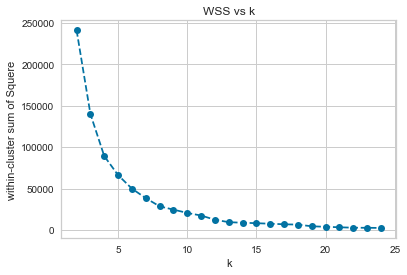

In [106]:
wss = []

for k in clusters:
    #model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    #model training
    kmeans.fit( X)
    #validation
    wss.append(kmeans.inertia_)

    #Plot wss Elbow Method
plt.plot( clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('k')
plt.ylabel('within-cluster sum of Squere')
plt.title('WSS vs k');


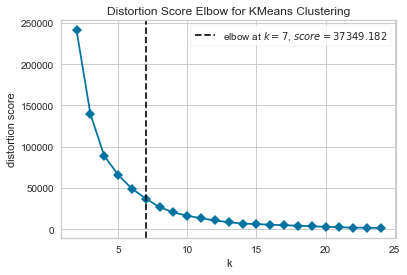

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [107]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show()

## <font color=blue> 7.1 Silhoutete Sccore (SS) </font>

In [ ]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters,metric='silhouette', timings=False)
kmeans.fit(X)
kmeans.show()

### 7.1.1 Silhouette Analysis

 For K = 2. Silhouette Score: 0.4155205190181732
 For K = 3. Silhouette Score: 0.4906475245952606
 For K = 4. Silhouette Score: 0.47940582036972046
 For K = 5. Silhouette Score: 0.5099301934242249
 For K = 6. Silhouette Score: 0.5549178719520569
 For K = 7. Silhouette Score: 0.5750096440315247


IndexError: index 3 is out of bounds for axis 0 with size 3

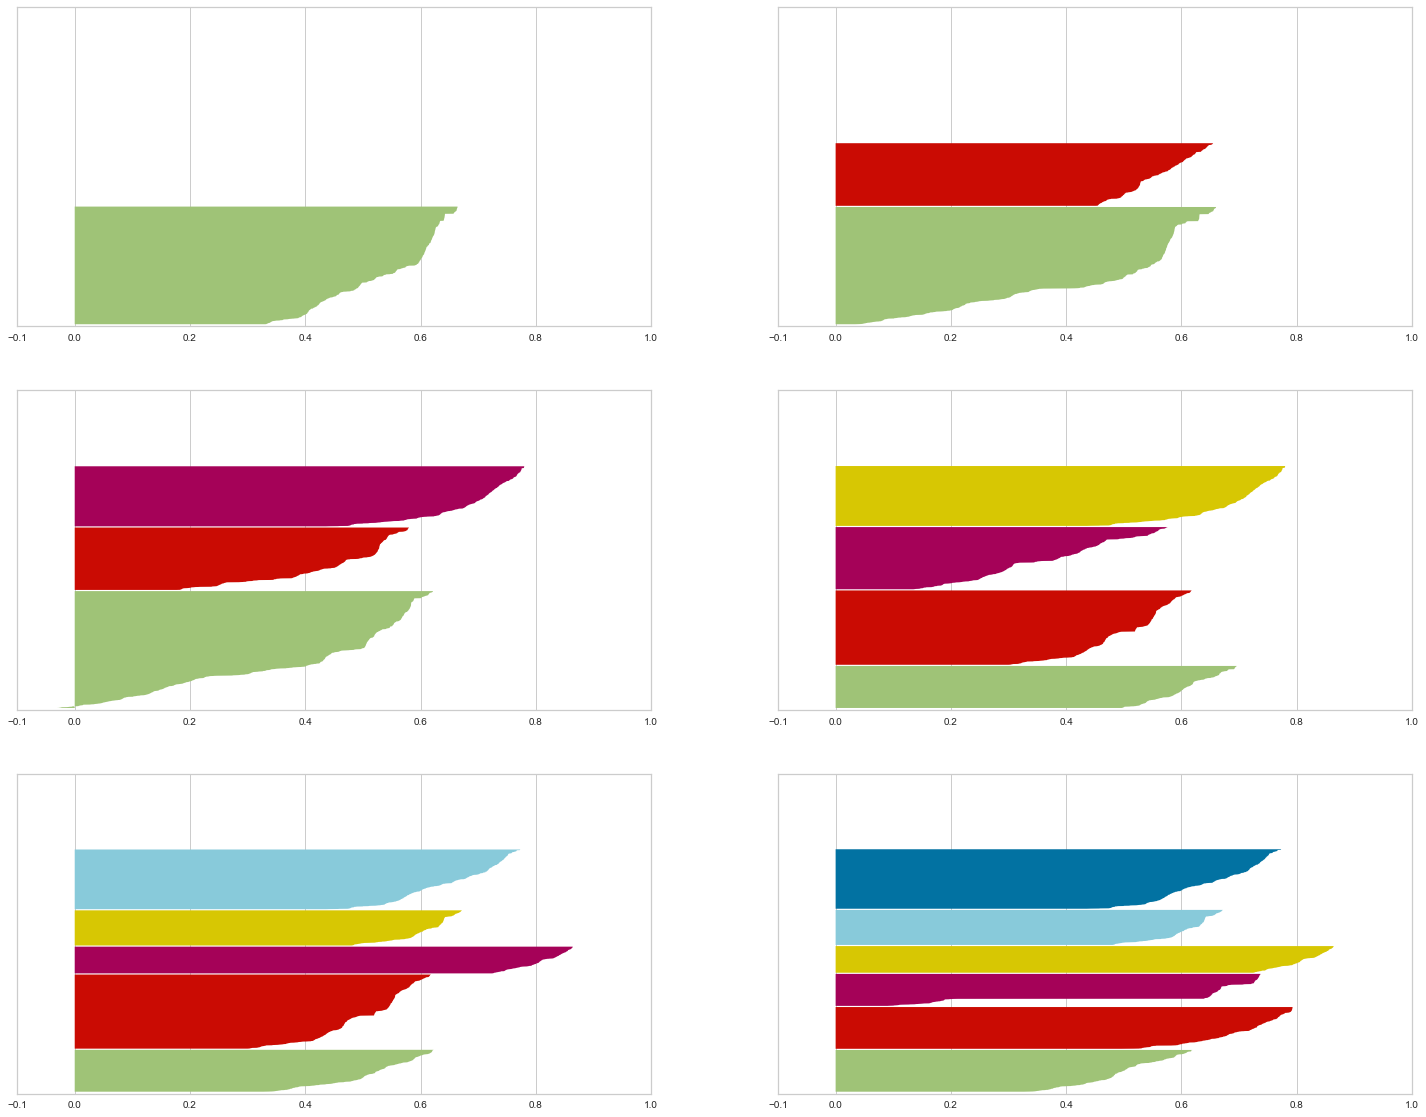

In [111]:
fig, ax = plt.subplots( 3, 2 )
fig.set_size_inches( 25, 20 )

for k in clusters:
    q, mod = divmod( k, 2 )
    
    ax[q-1, mod].set_xlim( [ -0.1, 1] )
    ax[q-1, mod].set_ylim( [ 0, len( X ) + ( k+1 )*10] )
    
    # model definition & training
    hc_model = hc.linkage( X, 'ward' )

    # model predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust' )

    # performance
    ss = m.silhouette_score( X, labels, metric='euclidean' )
    print( ' For K = {}. Silhouette Score: {}'.format( k, ss ) )

    samples_silhouette_values = m.silhouette_samples( X, labels )

    y_lower = 10
    for i in range( k ):

        # select clusters
        ith_samples_silhouette_values = samples_silhouette_values[ labels == i]
        
        # sort values
        ith_samples_silhouette_values.sort()

        # size clusters
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap( 'Spectral' )
        color = cmap( i / k )

        ax[q-1, mod].fill_betweenx( np.arange( y_lower, y_upper ), 0, ith_samples_silhouette_values  )
        
        y_lower = y_upper + 10
        
    ax[q-1, mod].set_yticks([])
    ax[q-1, mod].set_xticks( [-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

IndexError: index 3 is out of bounds for axis 0 with size 3

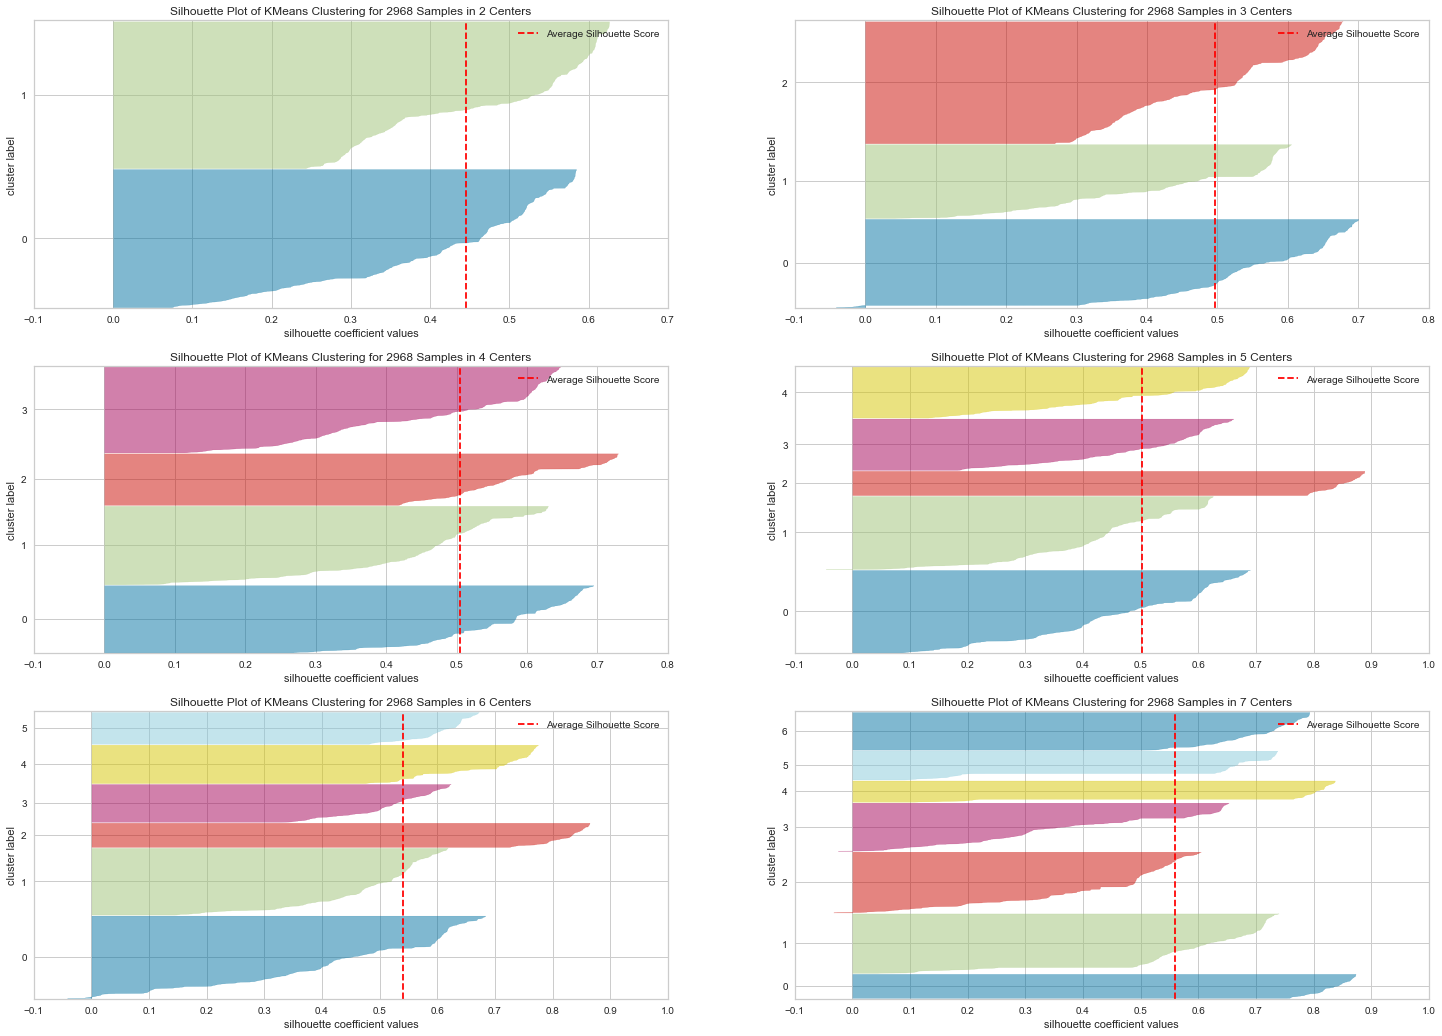

In [112]:
fig, ax = plt.subplots(3,2, figsize=(25,18) )

for k in clusters:
    km = c.KMeans( n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer( km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize()

# <font color='red' > 8.0 Model Training</font>

## 8.1 K-Means

In [113]:
#Model definition
k=11
kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )


#Model training
kmeans.fit( X )

#Clustering
labels = kmeans.labels_

## 8.2 Cluster Validation

In [115]:
# WSS ( within-cluster sum of square)
print(f'WSS value: {kmeans.inertia_}')

# SS (Silhouette Score)
print( 'SS value: {}'.format( m.silhouette_score( X, labels, metric='euclidean' ) ) )

WSS value: 17385.626953125
SS value: 0.5816227793693542


# <font color='red' > 9.0 Cluster Analysis</font>

In [140]:
df9= df6.copy()
df9['clusters'] = labels

In [141]:
#df9 = df4.copy()
#df9['cluster'] = labels
df9.head()

,embedding_x,embedding_y,clusters
0,24.632015,5.310959,3
1,20.140337,-1.596046,3
2,17.444908,18.421518,0
3,-5.817335,3.728041,9
4,6.212927,15.336797,8


## 9.1 Visualization Inspection

In [118]:
#fig = px.scatter_3d( df9, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster')
#fig.show()

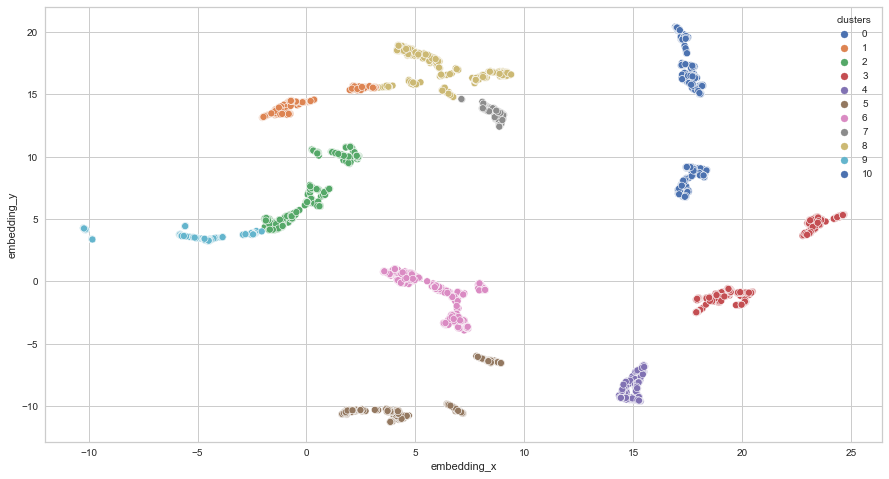

In [119]:
plt.gcf().set_size_inches(15, 8)
sns.scatterplot(x='embedding_x', y='embedding_y', hue='clusters', data=df9, palette='deep');

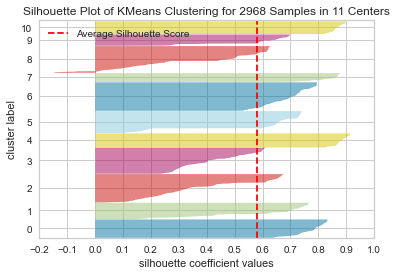

In [129]:
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick')
visualizer.fit(X)

visualizer.finalize()

## 9.2 2d Plot

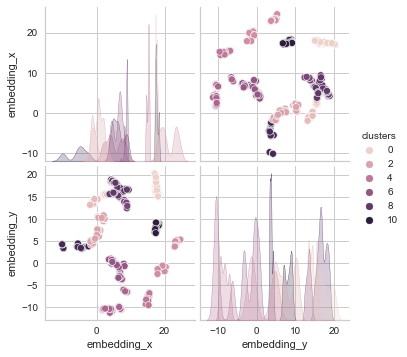

In [131]:
df_viz = df9.copy()
#plt.figure(figsize=(20,18))
sns.pairplot(df_viz, hue='clusters');

## 9.2.3 UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

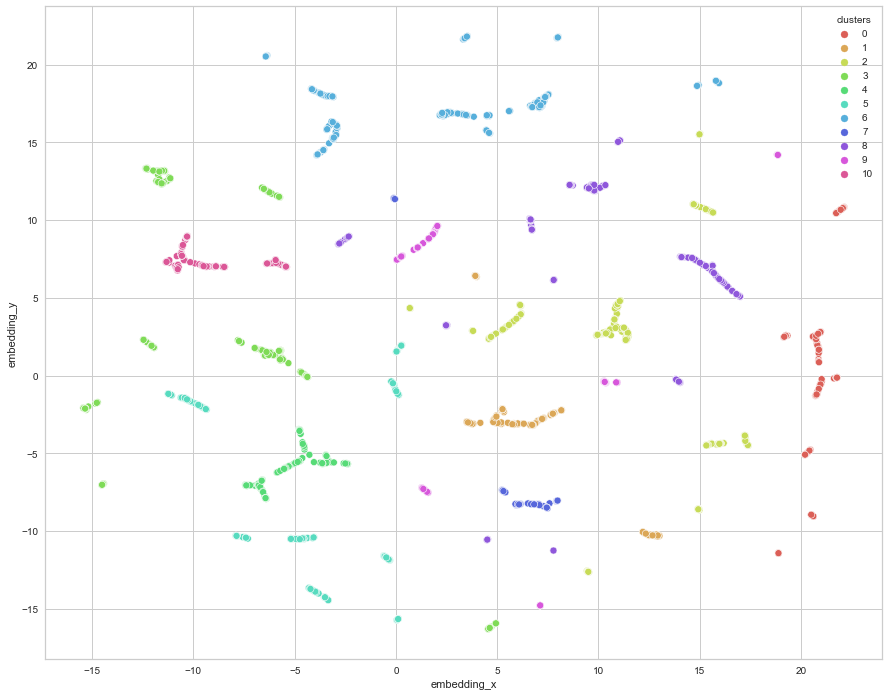

In [134]:
reducer = umap.UMAP(n_neighbors=20, random_state=42)
embedding = reducer.fit_transform(X)

#embeding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# plot MAP
plt.figure(figsize=(15, 12))
sns.scatterplot(x = 'embedding_x', y = 'embedding_y', 
                hue='clusters',
                palette=sns.color_palette('hls', n_colors= len(df_viz['clusters'].unique())),
                data=df_viz)

## 9.2 Cluster Profile

In [150]:
# cluster number
df_cluster = df9[['customer_id', 'clusters']].groupby('clusters').count().reset_index()
df_cluster['perc_customer'] = (df_cluster['customer_id']/ df_cluster['customer_id'].sum()*100)

#AVG gross revenue

df_avg_gross_revenue = df9[['gross_revenue', 'clusters']].groupby('clusters').mean().reset_index()

df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='clusters')

#AVG recency_days
df_avg_recency_days = df9[['recency_days', 'clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='clusters')

#AVG invoice_no
df_avg_invoice_no = df9[['qtde_products', 'clusters']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoice_no, how='inner', on='clusters')

#frequency
df_ticket = df9[['frequency', 'clusters']].groupby('clusters').mean().reset_index()
df_cluster =pd.merge(df_cluster, df_ticket, how='inner', on='clusters')

#Returns
df_ticket = df9[['qtde_returns', 'clusters']].groupby('cluster').mean().reset_index()
df_cluster =pd.merge(df_cluster, df_ticket, how='inner', on='clusters')
df_cluster

# <font color='red' > 10. Deploy</font>